<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK4/blob/main/UPASS_ML_WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise

Features Engineering for Linear Regression Model

Reference:
https://www.kaggle.com/code/klmsathishkumar/shipping-cost-prediction/notebook

Training dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv

Testing dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/test.csv

We will use features engineering technique to improve the predicting performance of shipping cost from linear regression model.

The steps are:

1. Load Explore and Prepare Dataset
2. Feature Engineering

*   Imputation
*   Discretization
*   Categorical Encoding
*   Feature Splitting
*   Handling Outliers
*   Variable Transformations
*   Scaling
*   Feature Creation in ML   
    
3. Modelling and Analyze the performance

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [ ]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv"

**[1.3]** Load the data into a DataFrame called df

In [ ]:
org_train = pd.read_csv(file_url, index_col=0)
df_train = pd.read_csv(file_url, index_col=0)

**[1.4]** Display the first 5 rows of df

In [ ]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


**[1.5]** Display the summary (info) of df

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            6500 non-null   object 
 1   Artist Reputation      5750 non-null   float64
 2   Height                 6125 non-null   float64
 3   Width                  5916 non-null   float64
 4   Weight                 5913 non-null   float64
 5   Material               5736 non-null   object 
 6   Price Of Sculpture     6500 non-null   float64
 7   Base Shipping Price    6500 non-null   float64
 8   International          6500 non-null   object 
 9   Express Shipment       6500 non-null   object 
 10  Installation Included  6500 non-null   object 
 11  Transport              5108 non-null   object 
 12  Fragile                6500 non-null   object 
 13  Customer Information   6500 non-null   object 
 14  Remote Location        572

**[1.6]** Check null values

In [ ]:
df_train.isnull().sum()

Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
# prompt: seperate categorical column and numerical

cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
num_cols = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns with missing values:")
print(df_train[cat_cols].columns[df_train[cat_cols].isnull().any()])

print("\nNumerical columns with missing values:")
print(df_train[num_cols].columns[df_train[num_cols].isnull().any()])

Categorical columns with missing values:
Index(['Material', 'Transport', 'Remote Location'], dtype='object')

Numerical columns with missing values:
Index(['Artist Reputation', 'Height', 'Width', 'Weight'], dtype='object')


#2. Features Engineering
Working with numerical values


In [ ]:
name_counts = df_train['Artist Name'].value_counts()
name_counts_morethanone = name_counts[name_counts > 1].index.tolist()
name_counts_justnone = name_counts[name_counts == 1].index.tolist()

len(name_counts_morethanone), len(name_counts_justnone)

(46, 6403)

In [ ]:
# prompt: check if name_counts_morethanone match item in name_counts_justnone

set(name_counts_morethanone) & set(name_counts_justnone)


set()

In [ ]:
# prompt: fill nan in Artist Reputation with 0

df_train['Artist Reputation'].fillna(0, inplace=True)


##**[2.1]** Immutation for 'Height', 'Width', 'Weight'

* Missing numerical variables are generally replaced by Mean or Median.



In [ ]:
# prompt: fill 'Height', 'Width', 'Weight' with mean

df_train['Height'] = df_train['Height'].fillna(df_train['Height'].mean())
df_train['Width'] = df_train['Width'].fillna(df_train['Width'].mean())
df_train['Weight'] = df_train['Weight'].fillna(df_train['Weight'].mean())


In [ ]:
# Placeholder for student's code
# Try fill 'Height', 'Width', 'Weight' with median

Missing categorical variables are generally replaced by Mode.

In [ ]:
# prompt: fill nan Material with mode

df_train['Material'].fillna(df_train['Material'].mode()[0], inplace=True)
df_train['Transport'].fillna(df_train['Transport'].mode()[0], inplace=True)
df_train['Remote Location'].fillna(df_train['Remote Location'].mode()[0], inplace=True)

In [ ]:
# check for null values

df_train.isnull().sum()

Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

##**[2.2]** Discretization

* Discretization involves grouping data values into bins.


In [ ]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
df_train['Material'].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone'],
      dtype=object)

In [ ]:
# prompt: create new column from 'Material' classify metal or non metal

df_train['Material_cat'] = np.where(df_train['Material'].str.contains('Metal'), 'Metal', 'Non-Metal')
df_train.head()


,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Material_cat
Customer Id,,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29,Non-Metal
fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96,Non-Metal
fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29,Non-Metal
fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16,Non-Metal
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23,Non-Metal


##**[2.3]** One-Hot Encoding

Beware OHE could dramatically increase the number of features and result in highly correlated features.

In [ ]:
# prompt: one-hot encoding for Material column

df_train = pd.get_dummies(df_train, columns=['Material'], prefix='Material_')


In [ ]:
pd.set_option('display.max_columns', None)
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Material_cat,Material__Aluminium,Material__Brass,Material__Bronze,Material__Clay,Material__Marble,Material__Stone,Material__Wood
Customer Id,,,,,,,,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29,Non-Metal,0,1,0,0,0,0,0
fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96,Non-Metal,0,1,0,0,0,0,0
fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29,Non-Metal,0,0,0,1,0,0,0
fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16,Non-Metal,1,0,0,0,0,0,0
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23,Non-Metal,1,0,0,0,0,0,0


##**[2.4]** Feature Splitting

In [ ]:
# prompt: df_train Scheduled Date and Delivery Date to datetime

df_train['Scheduled Date'] = pd.to_datetime(df_train['Scheduled Date'])
df_train['Delivery Date'] = pd.to_datetime(df_train['Delivery Date'])


In [ ]:
# prompt: split Scheduled Date to year month day columns seperate

df_train['Scheduled_Year'] = df_train['Scheduled Date'].dt.year
df_train['Scheduled_Month'] = df_train['Scheduled Date'].dt.month
df_train['Scheduled_Day'] = df_train['Scheduled Date'].dt.day


In [ ]:
pd.reset_option('all')
df_train.head()

<ipython-input-22-cc7c4be67025>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-22-cc7c4be67025>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-22-cc7c4be67025>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


,Artist Name,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,...,Material__Aluminium,Material__Brass,Material__Bronze,Material__Clay,Material__Marble,Material__Stone,Material__Wood,Scheduled_Year,Scheduled_Month,Scheduled_Day
Customer Id,,,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,13.91,16.27,Yes,Yes,No,...,0,1,0,0,0,0,0,2015,6,7
fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,6.83,15.00,No,No,No,...,0,1,0,0,0,0,0,2017,3,6
fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,4.96,21.18,No,No,No,...,0,0,0,1,0,0,0,2015,3,9
fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,5.81,16.31,No,No,No,...,1,0,0,0,0,0,0,2015,5,24
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,3.18,11.94,Yes,Yes,Yes,...,1,0,0,0,0,0,0,2016,12,18


##**[2.5]** Handling Outliers

Handline unusually high or low values in the dataset by Remove, Replace, or Capping the values

In [ ]:
org_train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


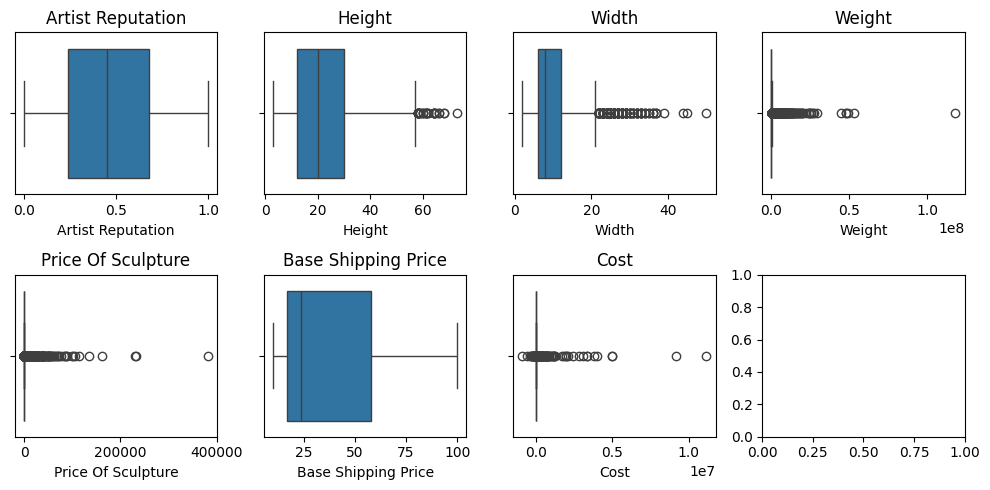

In [ ]:
# prompt: plot bloxplot for all column in org_train

import seaborn as sns

# Calculate the number of rows and columns for subplots
num_rows = 2
num_columns = len(num_cols) // 2 + len(num_cols) % 2  # Ensure an even number of columns if len(num_cols) is odd

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5))

# Flatten the axes array if there is only one row
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, col in enumerate(num_cols):
    if i < len(axes):  # Check if there are more axes available
      sns.boxplot(x=org_train[col], ax=axes[i])
      axes[i].set_title(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
org_train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [ ]:
train_rm_out = org_train.copy()
train_rp_out = org_train.copy()
train_cp_out = org_train.copy()

In [ ]:
# prompt: dealing with outliner by remove replace capping

# Remove outliers
Q1 = train_rm_out['Height'].quantile(0.25)
Q3 = train_rm_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rm_out = train_rm_out[(train_rm_out['Height'] >= lower_bound) & (org_train['Height'] <= upper_bound)]

In [ ]:
# prompt: replace outliner in train_rp_out

# Replace outliers
Q1 = train_rp_out['Height'].quantile(0.25)
Q3 = train_rp_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rp_out['Height'] = np.where((train_rp_out['Height'] < lower_bound) | (train_rp_out['Height'] > upper_bound), train_rp_out['Height'].median(), train_rp_out['Height'])


In [ ]:
# Cap outliers
train_cp_out['Height'] = train_cp_out['Height'].clip(lower_bound, upper_bound)

**Comparing** the shape of the dataset after performing Remove, Replace, Capping methods on outliers

In [ ]:
train_rm_out.shape, train_rp_out.shape, train_cp_out.shape

((6095, 19), (6500, 19), (6500, 19))

In [ ]:
train_rm_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5416.000000,6095.000000,5564.000000,5.571000e+03,6095.000000,6095.000000,6.095000e+03
mean,0.459983,21.568663,9.532351,3.893109e+05,1124.403187,37.316886,1.632250e+04
std,0.265164,11.657928,5.277406,2.633229e+06,8299.841620,26.810891,2.355540e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.230000,16.640000,1.882350e+02
50%,0.440000,20.000000,8.000000,3.109000e+03,7.940000,23.470000,3.786300e+02
75%,0.670000,29.000000,12.000000,3.639450e+04,86.955000,57.865000,1.144560e+03
max,1.000000,57.000000,45.000000,1.179279e+08,382385.670000,99.980000,1.114343e+07


In [ ]:
train_rp_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.560980,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.629854,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,29.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,57.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [ ]:
train_cp_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.742204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.889541,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,57.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


##**[2.6]** Variable Transformations

<ipython-input-34-17a2c1c1a136>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Cost'])


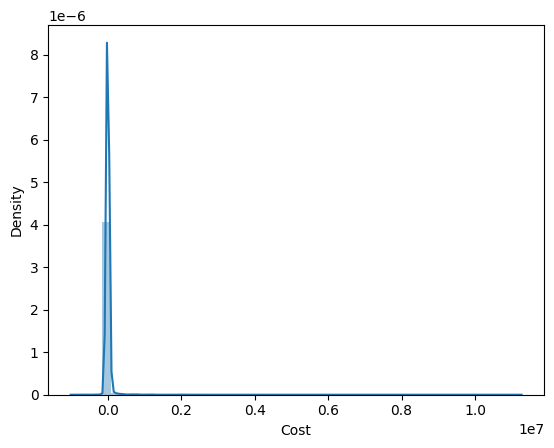

In [ ]:
# prompt: plot df_train['Cost'] to show distribution

sns.distplot(df_train['Cost'])
plt.show()

In [ ]:
df_train['Log_Cost'] = df_train['Cost'].apply(lambda x : np.log1p(abs(x)))

<ipython-input-36-88d0b65ca9cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Log_Cost'])


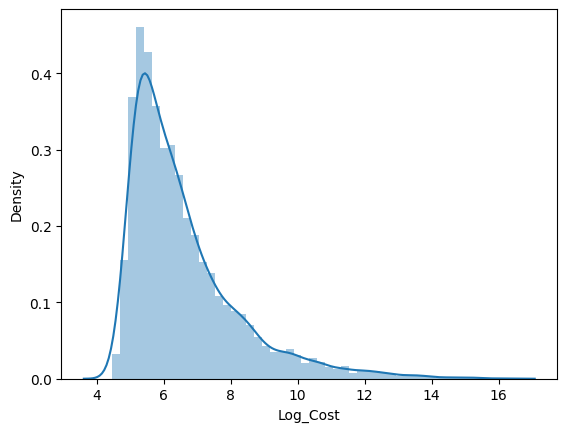

In [ ]:
sns.distplot(df_train['Log_Cost'])
plt.show()

In [ ]:
# prompt: apply Quantile Transformer Scaler to df_train['Cost'] create a new column call 'Quan_Cost'

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
df_train['Quan_Cost'] = scaler.fit_transform(df_train['Cost'].values.reshape(-1, 1))


<ipython-input-38-026b92e578da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Quan_Cost'])


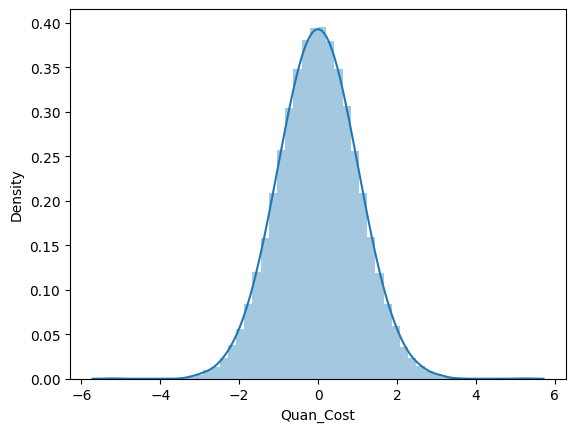

In [ ]:
sns.distplot(df_train['Quan_Cost'])
plt.show()

##**[2.7]** Scaling

In [ ]:
df_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,...,Material__Bronze,Material__Clay,Material__Marble,Material__Stone,Material__Wood,Scheduled_Year,Scheduled_Month,Scheduled_Day,Log_Cost,Quan_Cost
Customer Id,,,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,13.91,16.27,Yes,Yes,No,...,0,0,0,0,0,2015,6,7,5.649995,-1.518089
fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,6.83,15.00,No,No,No,...,0,0,0,0,0,2017,3,6,5.081156,-1.334687
fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,4.96,21.18,No,No,No,...,0,1,0,0,0,2015,3,9,5.045294,-1.318061
fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,5.81,16.31,No,No,No,...,0,0,0,0,0,2015,5,24,5.088584,-1.336177
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,3.18,11.94,Yes,Yes,Yes,...,0,0,0,0,0,2016,12,18,5.076610,-1.333322


#3. Train LinearRegression Model


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [ ]:
org_train.head()

,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
Customer Id,,,,,,,,,,,,,,,,,,,
fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
org_train.dropna(inplace=True)

In [ ]:
org_train.isnull().sum()

Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

In [ ]:
num_cols = org_train.select_dtypes(exclude=['object']).columns.tolist()

print("\nNumerical columns:")
print(num_cols)


Numerical columns:
['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']


In [ ]:
# prompt: y=org_train Base Shipping Price, X = org_train[num_cols] except Base Shipping Price

y = org_train['Base Shipping Price']
X = org_train[num_cols]
X = X.drop('Base Shipping Price', axis=1)


In [ ]:
X.shape, y.shape

((3362, 6), (3362,))

In [ ]:
# prompt: import Linear regression fit X, y prediction

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
# prompt: print rmse mae

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 24.950222678542406
MAE: 20.348215708227503


#3. Train LinearRegression Model on Features engineered dataset


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [ ]:
df_train.isnull().sum()

Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
Material_cat             0
Material__Aluminium      0
Material__Brass          0
Material__Bronze         0
Material__Clay           0
Material__Marble         0
Material__Stone          0
Material__Wood           0
Scheduled_Year           0
Scheduled_Month          0
Scheduled_Day            0
Log_Cost                 0
Quan_Cost                0
dtype: int64

In [ ]:
num_cols_df = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("\nNumerical columns: ")
print(num_cols_df)


Numerical columns: 
['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Scheduled Date', 'Delivery Date', 'Cost', 'Material__Aluminium', 'Material__Brass', 'Material__Bronze', 'Material__Clay', 'Material__Marble', 'Material__Stone', 'Material__Wood', 'Scheduled_Year', 'Scheduled_Month', 'Scheduled_Day', 'Log_Cost', 'Quan_Cost']


In [ ]:
# prompt: y=org_train Base Shipping Price, X = org_train[num_cols] except Base Shipping Price

y2 = df_train['Base Shipping Price']
X2 = df_train[num_cols]
X2 = X2.drop('Base Shipping Price', axis=1)

In [ ]:
X2.shape, y2.shape

((6500, 6), (6500,))

In [ ]:
# prompt: import Linear regression fit X, y prediction

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X2, y2)
y_pred2 = model.predict(X2)


**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [ ]:
# prompt: print rmse mae

rmse = mean_squared_error(y2, y_pred2, squared=False)
mae = mean_absolute_error(y2, y_pred2)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 25.043947678604418
MAE: 20.424194793991337


#4. Compare the performance metrics
Do new features improve the performance of the models? If not what went wrong and how do we fix this?

In [ ]:
org_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3362 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Name            3362 non-null   object 
 1   Artist Reputation      3362 non-null   float64
 2   Height                 3362 non-null   float64
 3   Width                  3362 non-null   float64
 4   Weight                 3362 non-null   float64
 5   Material               3362 non-null   object 
 6   Price Of Sculpture     3362 non-null   float64
 7   Base Shipping Price    3362 non-null   float64
 8   International          3362 non-null   object 
 9   Express Shipment       3362 non-null   object 
 10  Installation Included  3362 non-null   object 
 11  Transport              3362 non-null   object 
 12  Fragile                3362 non-null   object 
 13  Customer Information   3362 non-null   object 
 14  Remote Location        336

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, fffe3900350033003300 to fffe3700310031003600
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Artist Name            6500 non-null   object        
 1   Artist Reputation      6500 non-null   float64       
 2   Height                 6500 non-null   float64       
 3   Width                  6500 non-null   float64       
 4   Weight                 6500 non-null   float64       
 5   Price Of Sculpture     6500 non-null   float64       
 6   Base Shipping Price    6500 non-null   float64       
 7   International          6500 non-null   object        
 8   Express Shipment       6500 non-null   object        
 9   Installation Included  6500 non-null   object        
 10  Transport              6500 non-null   object        
 11  Fragile                6500 non-null   object        
 12  Customer Information   6500 non-